## Load File

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Dataset/Automobile.csv')
print(f"Shape of the DataFrame: {df.shape}")
display(df.head())
# df.dropna(inplace=True)

Shape of the DataFrame: (205, 26)


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


## Cleaning

In [ ]:
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    df[col] = df[col].fillna(df[col].median())
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

<ipython-input-2-0d1feec738f4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)


## Splitting

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Feature Selection (justify choices in comments)
features = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'num-of-cylinders', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'normalized-losses']
# Selected features based on intuition and previous exploration.  Features like 'make', 'fuel-type', etc., are likely to be influential in determining insurance risk.

X = df[features]
y = df['symboling']

# One-Hot Encoding
categorical_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'num-of-cylinders']
numerical_features = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'normalized-losses']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# Create a new dataframe with the processed features
X_processed_df = pd.DataFrame(X_processed)

display(X_processed_df.head())
###


# Assuming 'y' is already defined as the target variable (symboling)
y = df['symboling']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.173309,-0.264983,-0.646553,-0.546059,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.173309,-0.264983,-0.646553,-0.546059,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,1.263761,-0.264983,-0.953012,-0.691627,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.054925,0.785723,-0.186865,-0.109354,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,0.274747,0.785723,-1.106241,-1.273900,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


X_train shape: (164, 57)
X_test shape: (41, 57)
y_train shape: (164,)
y_test shape: (41,)


## Training

In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression object
linear_regression_model = LinearRegression()

# Train the model using the training data
linear_regression_model.fit(X_train, y_train)

LinearRegression()

## Evalauasi

Evaluation Metrics:

1. Root Mean Squared Error (RMSE)
Formula: RMSE = sqrt(MSE) = sqrt(1/n * Σ(yi - ŷi)^2)
Meaning: RMSE measures the average difference between the predicted and actual values in the same unit as the target variable.  Lower RMSE indicates better model performance.  A good score is close to 0, indicating that the model's predictions are very accurate.  A bad score is a high value, meaning the model's predictions are significantly off.
RMSE: 0.7322549763356405


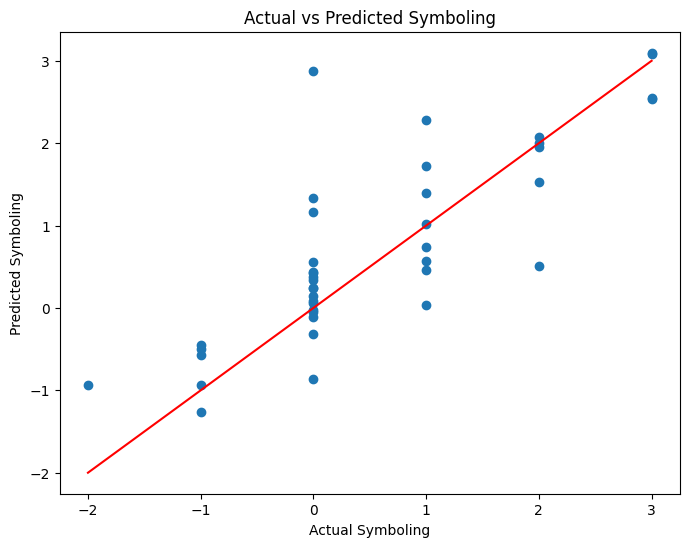


2. Mean Squared Error (MSE)
Formula: MSE = 1/n * Σ(yi - ŷi)^2
Meaning: MSE calculates the average squared difference between predicted and actual values.  It penalizes larger errors more heavily than smaller errors.  Similar to RMSE, a lower MSE signifies better performance.  A good score is close to 0, and a bad score is a large value.
MSE: 0.5361973503683094


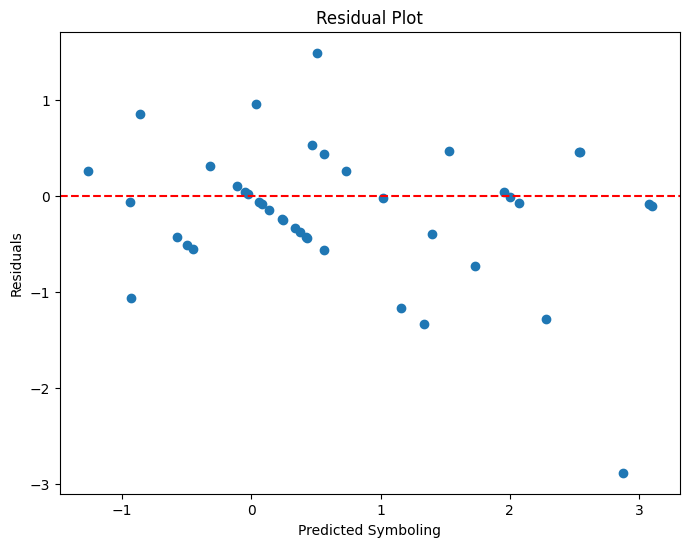


3. R-squared (R2)
Formula: R^2 = 1 - (SSres / SStot) = 1 - [Σ(yi - ŷi)^2 / Σ(yi - ȳ)^2]
Meaning: R-squared represents the proportion of variance in the target variable explained by the model.  It ranges from 0 to 1, where 1 indicates that the model perfectly fits the data.  A good score is close to 1, indicating that a high proportion of the variance is explained. A bad score is close to 0, suggesting the model doesn't explain much of the variance.
R-squared: 0.6341932849151266


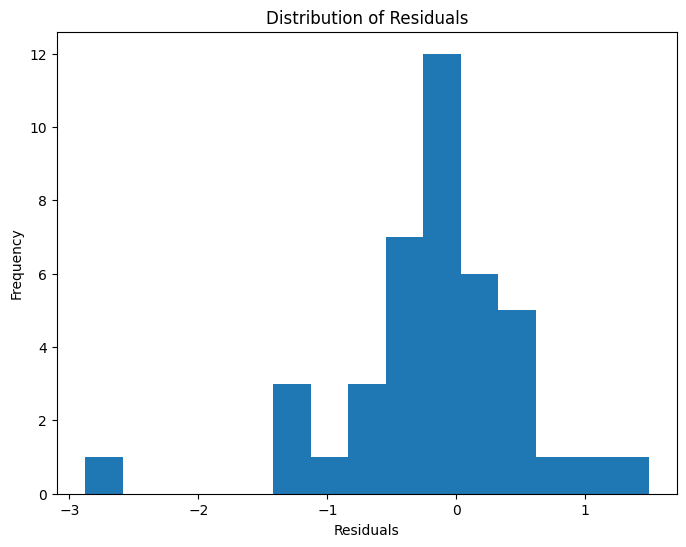

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics along with formulas and explanations
print("Evaluation Metrics:")

print("\n1. Root Mean Squared Error (RMSE)")
print("Formula: RMSE = sqrt(MSE) = sqrt(1/n * Σ(yi - ŷi)^2)")
print("Meaning: RMSE measures the average difference between the predicted and actual values in the same unit as the target variable.  Lower RMSE indicates better model performance.  A good score is close to 0, indicating that the model's predictions are very accurate.  A bad score is a high value, meaning the model's predictions are significantly off.")
print(f"RMSE: {rmse}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Actual vs Predicted Symboling")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line for reference
plt.show()

print("\n2. Mean Squared Error (MSE)")
print("Formula: MSE = 1/n * Σ(yi - ŷi)^2")
print("Meaning: MSE calculates the average squared difference between predicted and actual values.  It penalizes larger errors more heavily than smaller errors.  Similar to RMSE, a lower MSE signifies better performance.  A good score is close to 0, and a bad score is a large value.")
print(f"MSE: {mse}")

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Symboling")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

print("\n3. R-squared (R2)")
print("Formula: R^2 = 1 - (SSres / SStot) = 1 - [Σ(yi - ŷi)^2 / Σ(yi - ȳ)^2]")
print("Meaning: R-squared represents the proportion of variance in the target variable explained by the model.  It ranges from 0 to 1, where 1 indicates that the model perfectly fits the data.  A good score is close to 1, indicating that a high proportion of the variance is explained. A bad score is close to 0, suggesting the model doesn't explain much of the variance.")
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=15)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


# **1. Mean Squared Error (MSE)**
MSE adalah metrik yang mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual. Semakin kecil nilai MSE, semakin baik model.

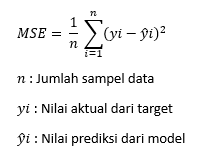

Selisih antara nilai prediksi dan nilai aktual dikuadratkan untuk menghindari nilai negatif dan memberikan penekanan lebih pada kesalahan yang besar.
Rata-rata dari semua selisih kuadrat dihitung lalu akan mendapatkan MSE.

# **2. Root Mean Squared Error (RMSE)**
RMSE adalah akar kuadrat dari MSE. Ini memberikan gambaran tentang besarnya kesalahan dalam satuan yang sama dengan target.
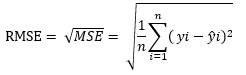


# **3. R-squared (Koefisien Determinasi)**
R-squared mengukur seberapa baik variabilitas target dapat dijelaskan oleh model. Nilainya berkisar antara 0 dan 1, di mana 1 menunjukkan model yang sempurna.

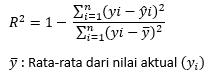